In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv("../DATA/penguins_size.csv")

In [40]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [42]:
df=df.dropna()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [44]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [45]:
df[df['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [46]:
df.at[336,'sex']='FEMALE'

In [47]:
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                  FEMALE
Name: 336, dtype: object

In [48]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
 |
 |  A random forest classifier.
 |
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeClassifier`.
 |  The sub-sample size is controlled with the `max_samples` parameter i

In [53]:
model = RandomForestClassifier(n_estimators=10,max_features='sqrt',random_state=101)

In [54]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [55]:
preds = model.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [57]:
confusion_matrix(preds,y_test)

array([[40,  1,  0],
       [ 1, 22,  0],
       [ 0,  0, 37]])

In [58]:
model.feature_importances_

array([3.46584088e-01, 1.20150588e-01, 2.39262547e-01, 1.48533620e-01,
       1.39253740e-01, 2.10550136e-05, 6.19436222e-03])

In [59]:
test_error = []

for n in range(1,40):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='sqrt')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))
 

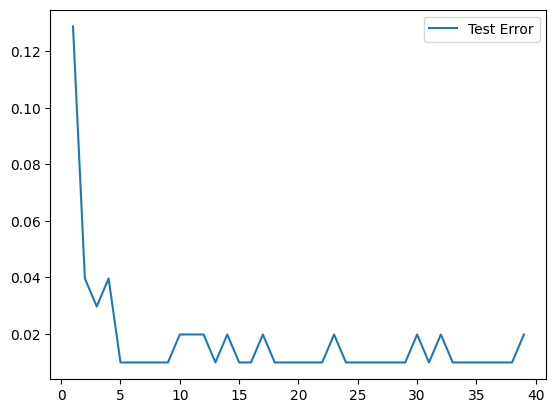

In [60]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()

In [61]:
df = pd.read_csv("../DATA/data_banknote_authentication.csv")

In [62]:
df = pd.read_csv("../DATA/data_banknote_authentication.csv")

In [63]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


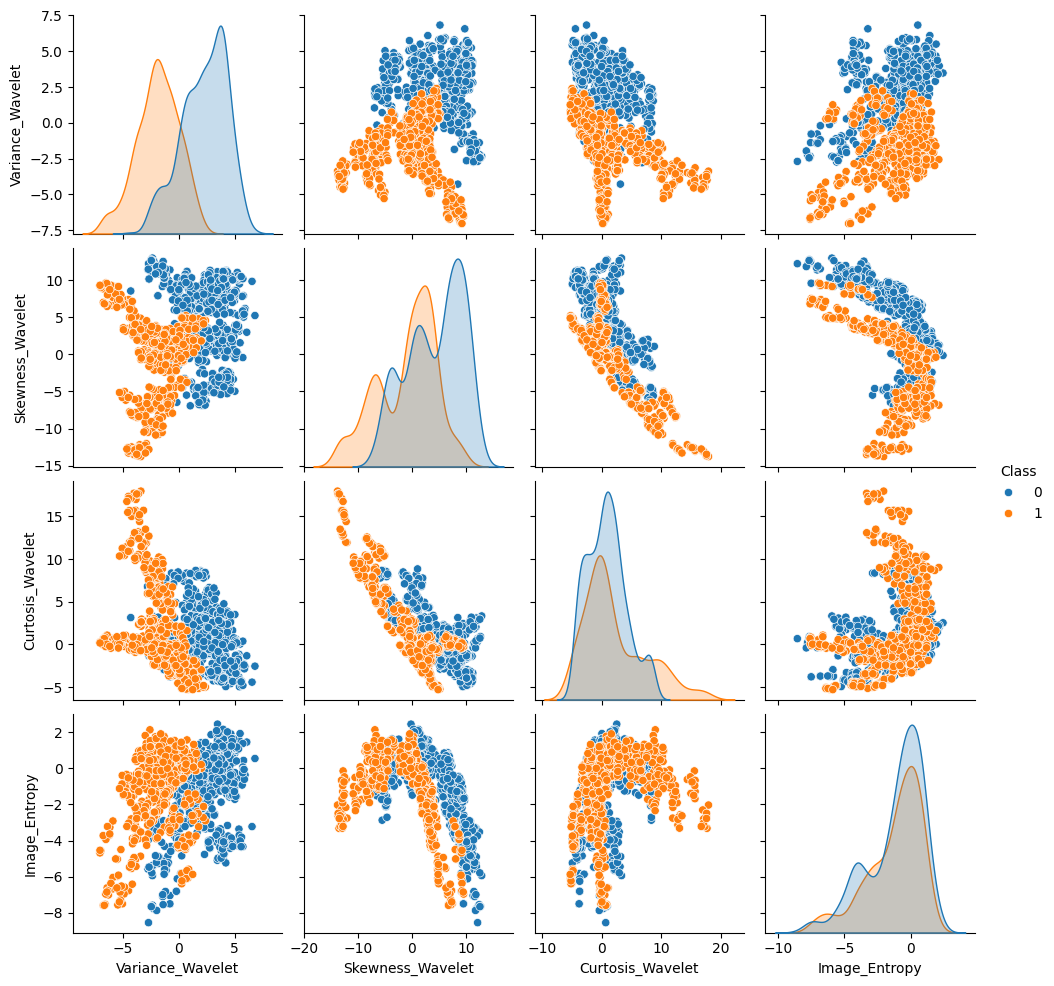

In [64]:
sns.pairplot(df,hue='Class')

In [31]:
X = df.drop('Class',axis=1)
y = df['Class']

In [32]:
from sklearn.model_selection import train_test_split

In [65]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.

    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        com

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
param_grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'bootstrap':bootstrap,
    'oob_score':oob_score
}

In [73]:
rfc = RandomForestClassifier()

In [74]:
grid = GridSearchCV(rfc,param_grid)

In [76]:
grid.fit(X_train,y_train)

C:\Users\gouth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gouth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gouth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-pac

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [77]:
grid.best_estimator_

RandomForestClassifier(max_features=2, n_estimators=200, oob_score=True)

In [78]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 200, 'oob_score': True}

In [79]:
preds = grid.predict(X_test)

In [80]:
from sklearn.metrics import confusion_matrix,classification_report

In [81]:
classification_report(preds,y_test)

'              precision    recall  f1-score   support\n\n      Adelie       0.95      0.95      0.95        22\n   Chinstrap       0.93      0.93      0.93        15\n      Gentoo       1.00      1.00      1.00        14\n\n    accuracy                           0.96        51\n   macro avg       0.96      0.96      0.96        51\nweighted avg       0.96      0.96      0.96        51\n'

In [82]:
confusion_matrix(y_test,preds)

array([[21,  1,  0],
       [ 1, 14,  0],
       [ 0,  0, 14]])

In [83]:
from sklearn.metrics import accuracy_score

In [84]:
errors = []
misclassifications = []

for n in range(1,64):
    rfc = RandomForestClassifier( n_estimators=n,bootstrap=True,max_features= 2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(preds,y_test)
    n_missed = np.sum(preds != y_test) # watch the video to understand this line!!
    errors.append(err)
    misclassifications.append(n_missed)

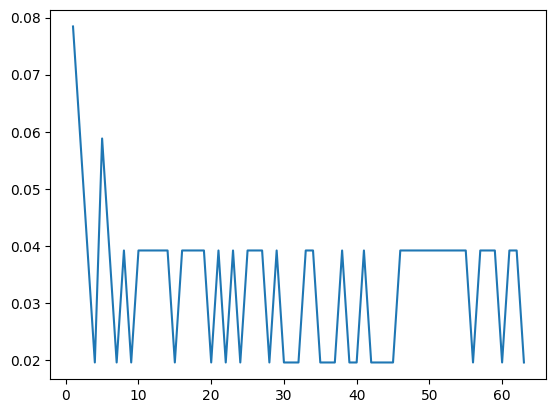

In [85]:
plt.plot(range(1,64),errors)

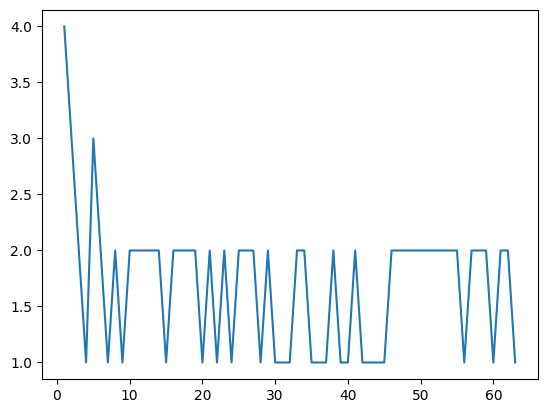

In [86]:
plt.plot(range(1,64),misclassifications)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DATA/rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [5]:
df.columns = ['Signal','Density']

<Axes: xlabel='Signal', ylabel='Density'>

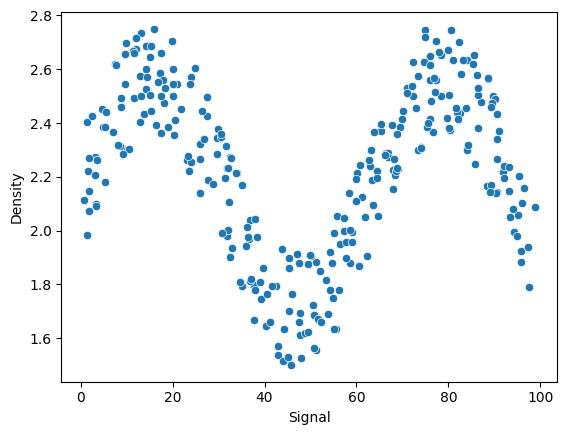

In [6]:
sns.scatterplot(x='Signal',y='Density',data=df)

In [7]:
from sklearn.model_selection import train_test_split

In [13]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr_model = LinearRegression()

In [17]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [18]:
lr_preds = lr_model.predict(X_test)

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [20]:
MAE = mean_squared_error(lr_preds,y_test)

In [21]:
np.sqrt(mean_squared_error(y_test,lr_preds))

np.float64(0.2570051996584629)

In [23]:
signal_range = np.arange(0,100)

In [24]:
lr_output = lr_model.predict(signal_range.reshape(-1,1))

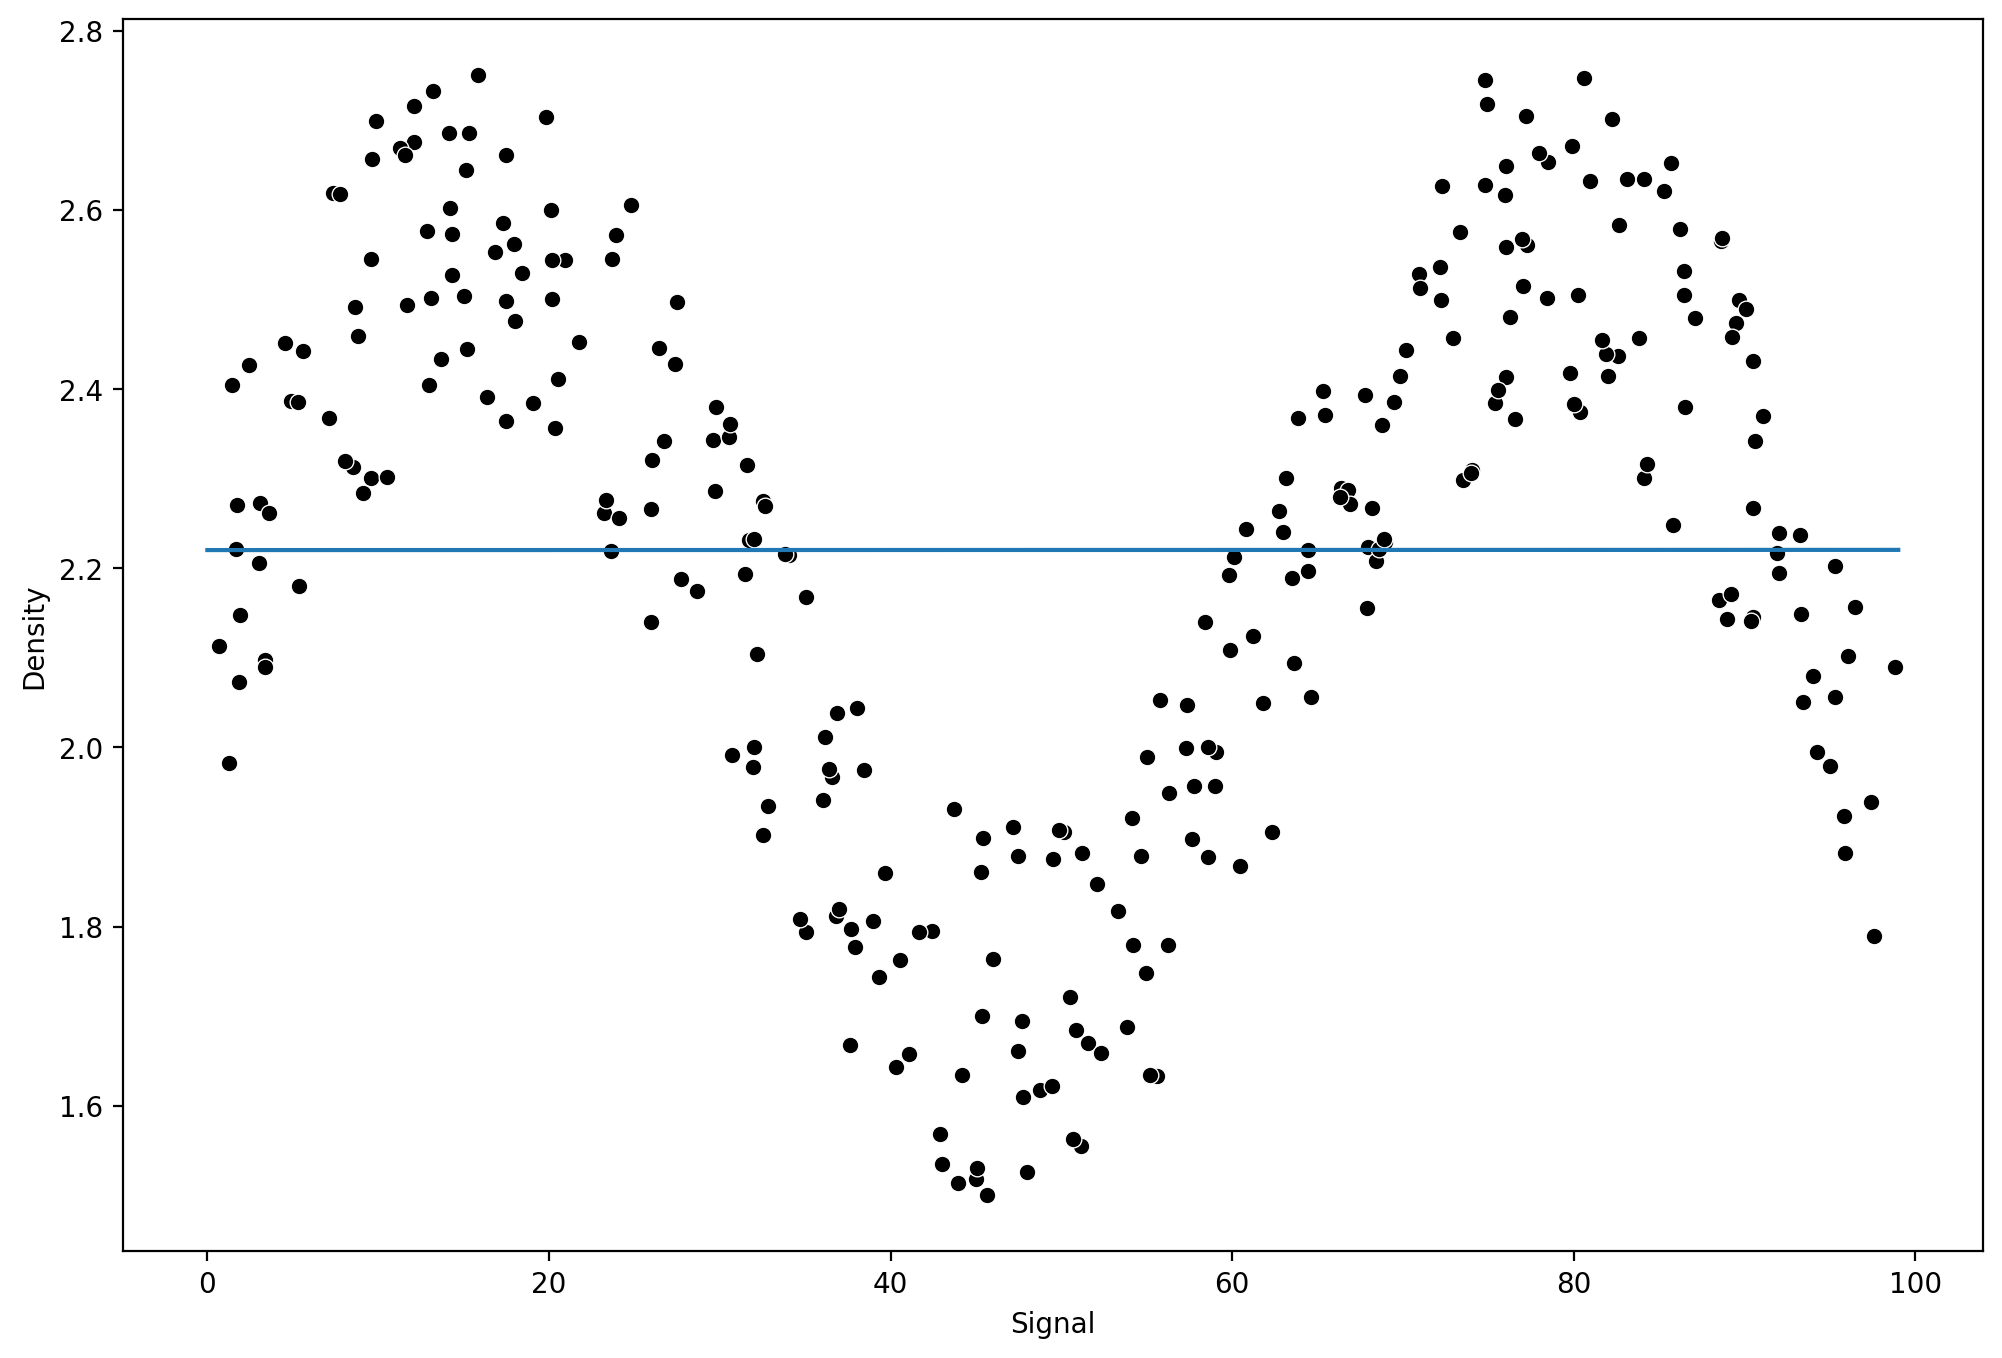

In [25]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df,color='black')
plt.plot(signal_range,lr_output)

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [27]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

In [29]:
from sklearn.pipeline import make_pipeline

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
pipe = make_pipeline(PolynomialFeatures(2),LinearRegression())

RMSE : 0.2817309563725596


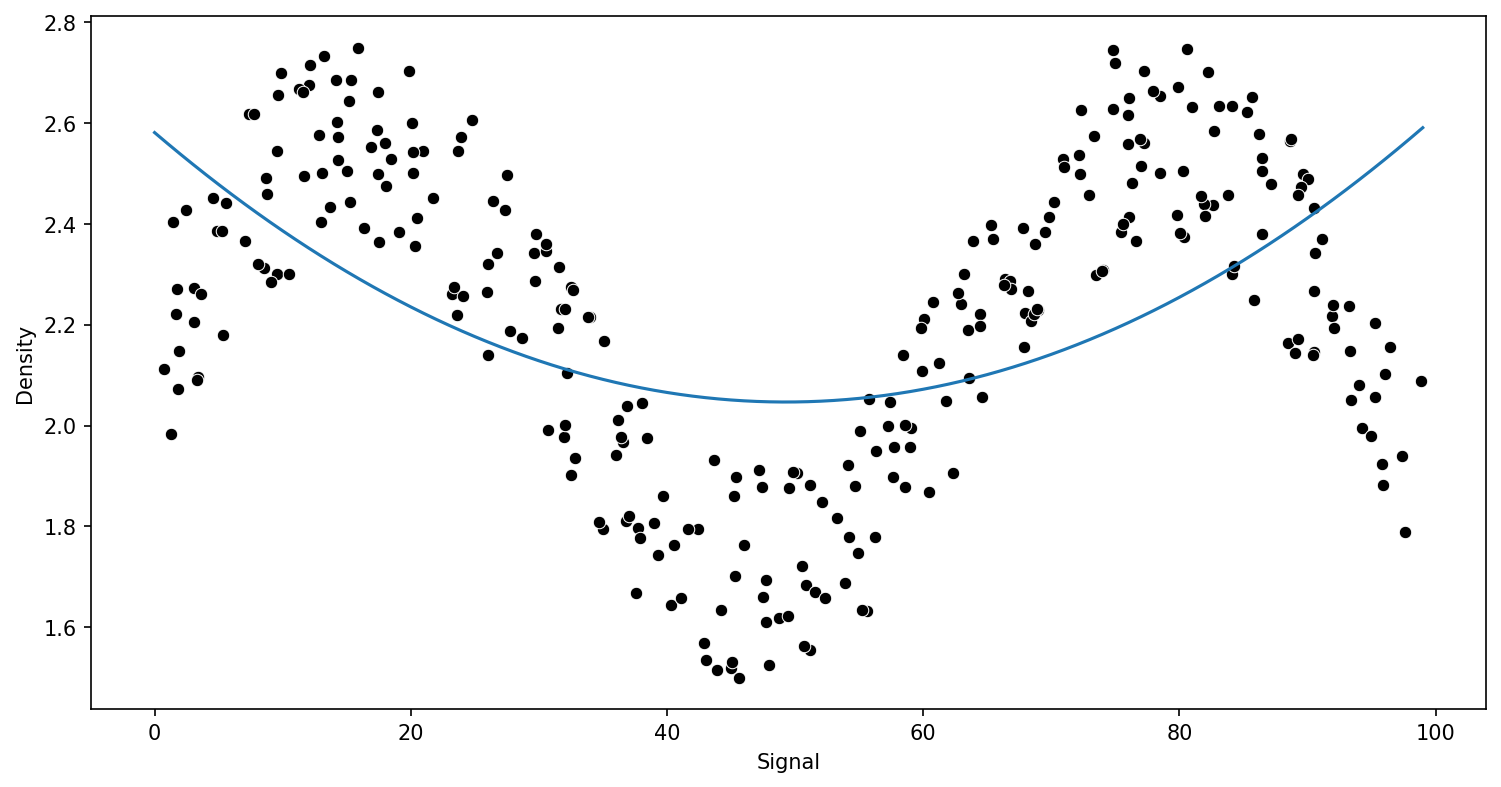

In [32]:
run_model(pipe,X_train,y_train,X_test,y_test)

RMSE : 0.16269005292854596


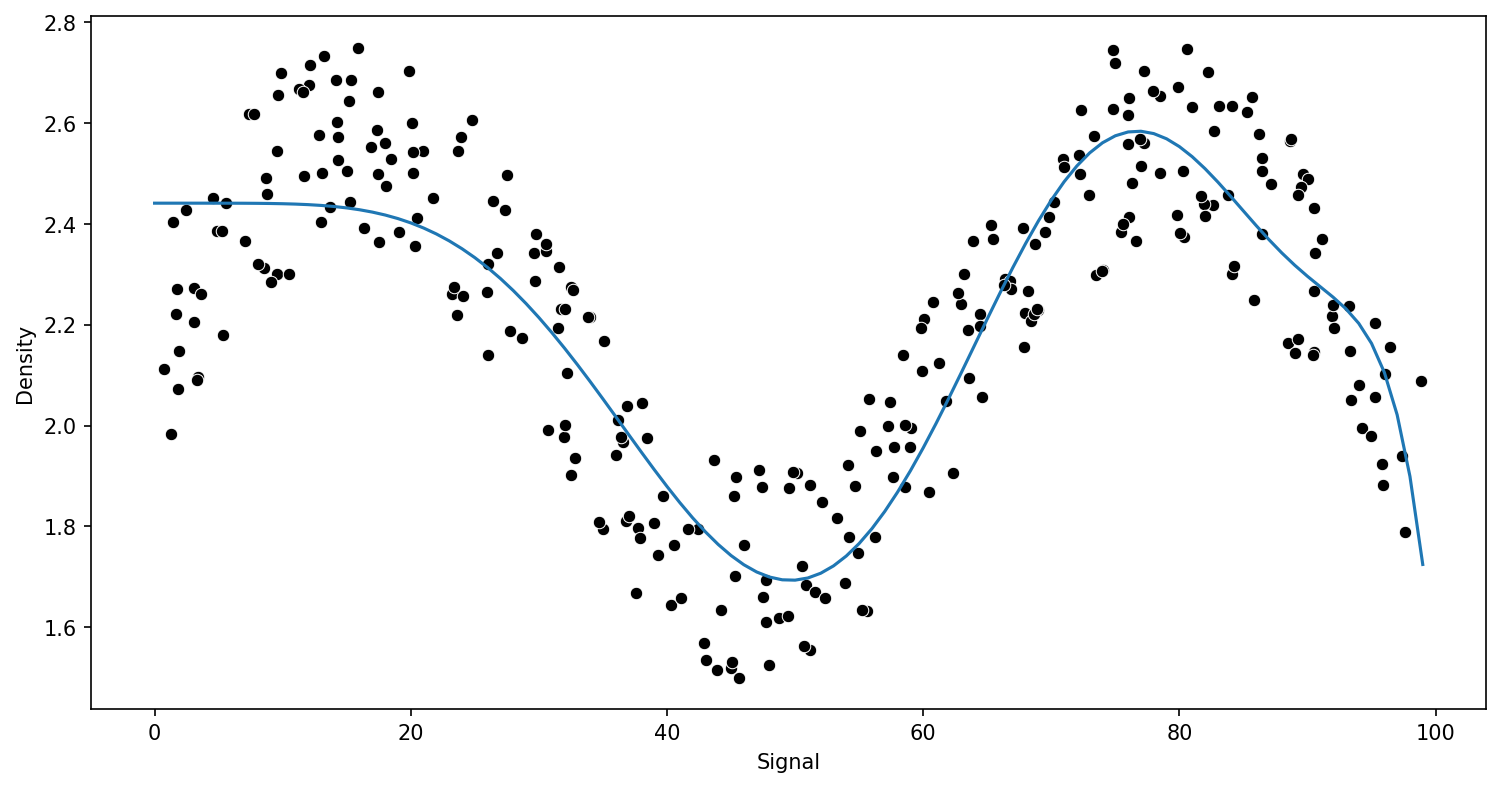

In [33]:
pipe = make_pipeline(PolynomialFeatures(10),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

In [34]:
from sklearn.neighbors import KNeighborsRegressor

RMSE : 0.1523487028635337
RMSE : 0.13730685016923647
RMSE : 0.13277855732740926


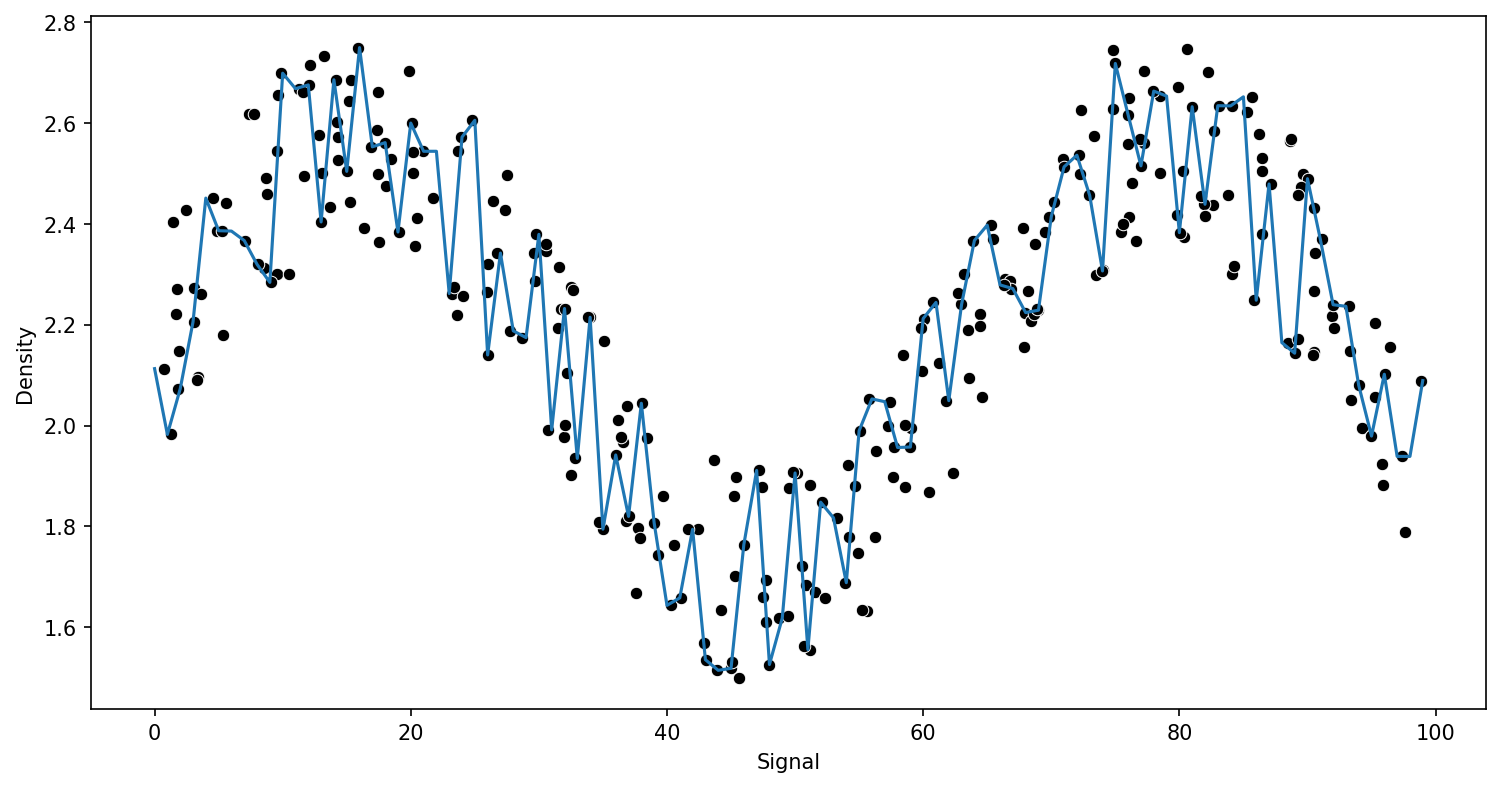

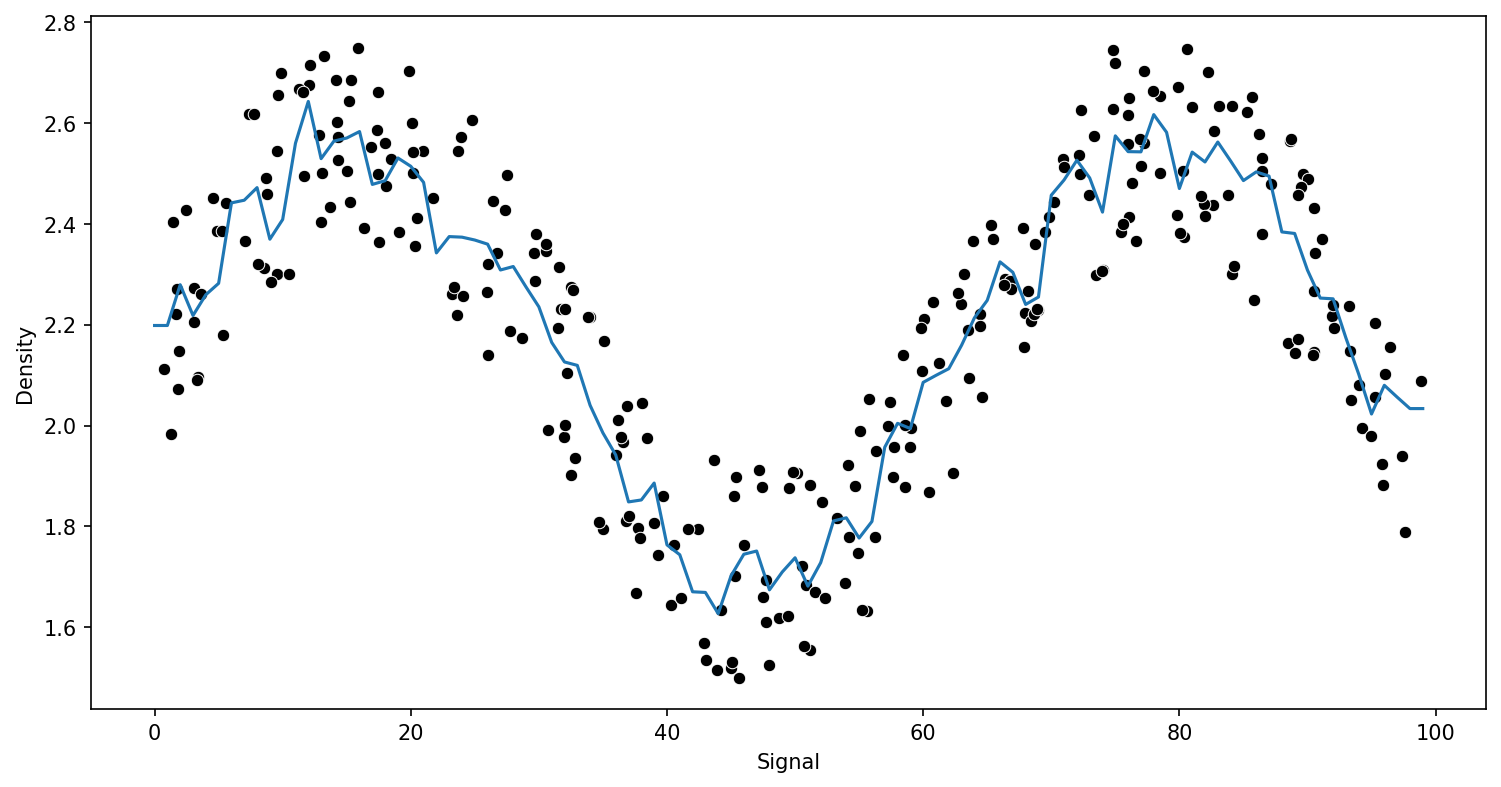

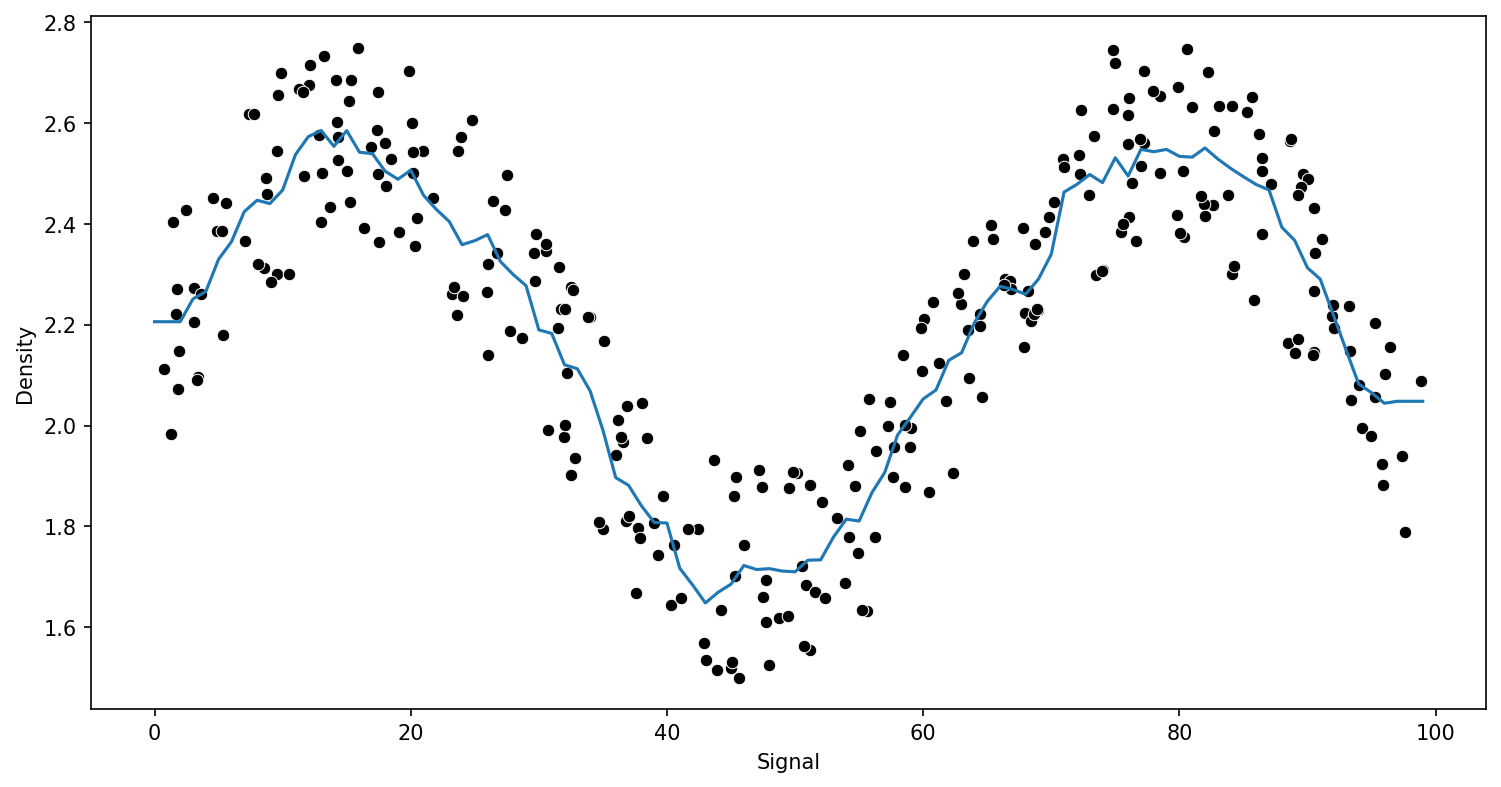

In [35]:
preds = {}
k_values = [1,5,10]
for n in k_values:
    
    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

In [36]:
from sklearn.tree import DecisionTreeRegressor

RMSE : 0.1523487028635337


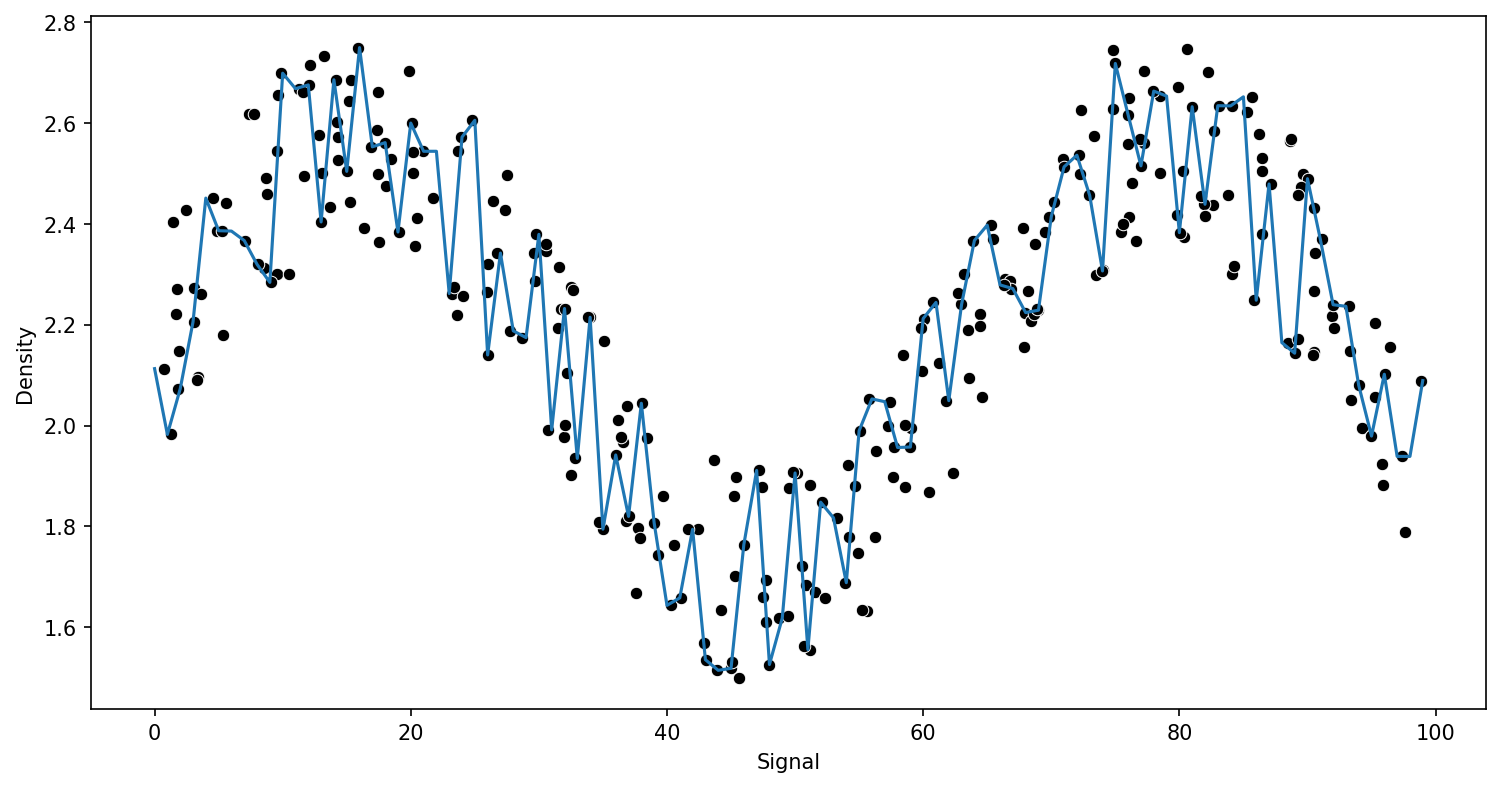

In [37]:
model = DecisionTreeRegressor()

run_model(model,X_train,y_train,X_test,y_test)

In [40]:
model.get_n_leaves()

np.int64(270)

In [41]:
from sklearn.svm import SVR

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

In [44]:
grid = GridSearchCV(svr,param_grid)

RMSE : 0.12646999302046696


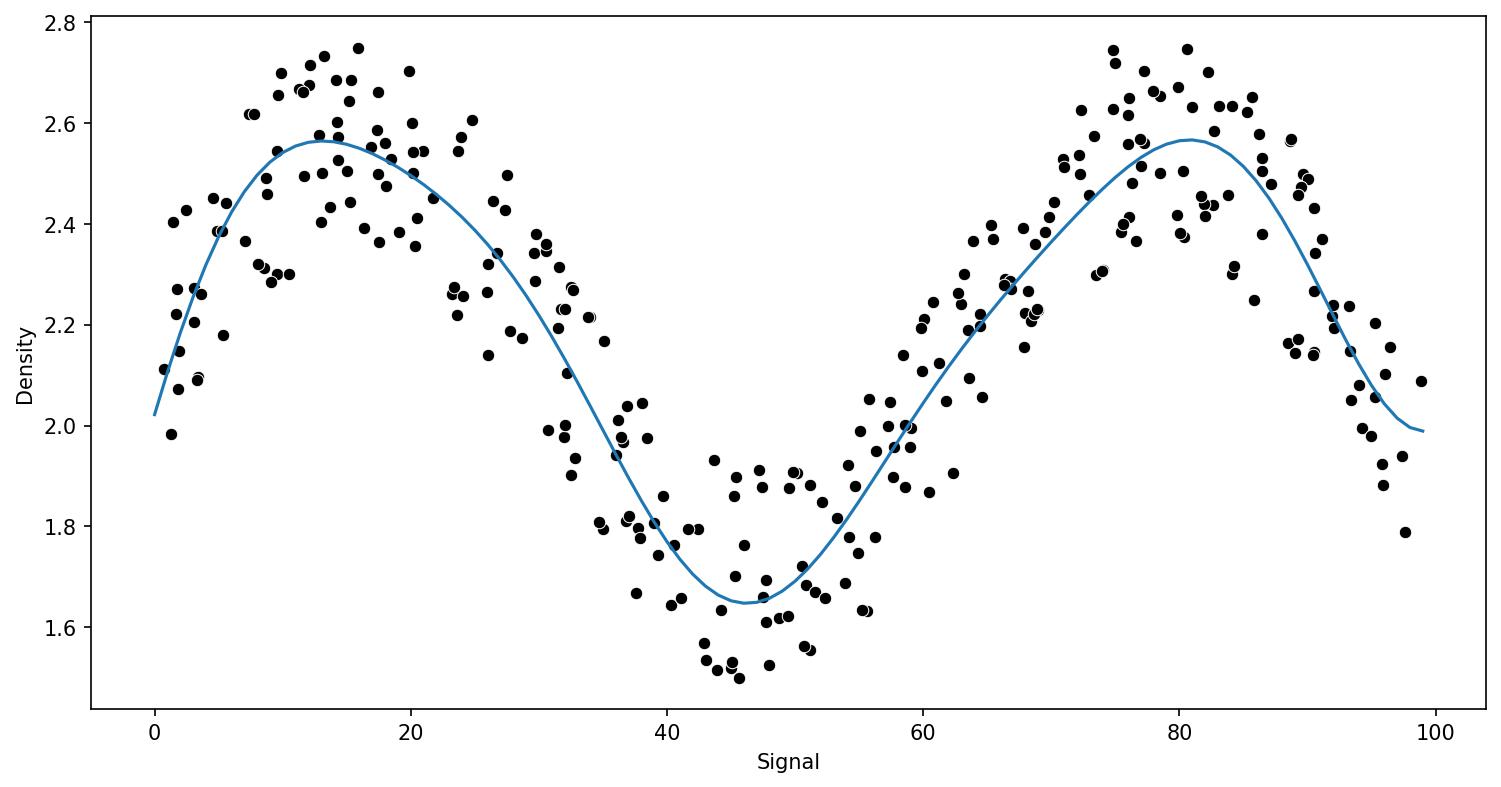

In [45]:
run_model(grid,X_train,y_train,X_test,y_test)

In [46]:
grid.best_estimator_

SVR(C=1000)

In [47]:
from sklearn.ensemble import RandomForestRegressor

RMSE : 0.13524913319133677
RMSE : 0.13449616750808016
RMSE : 0.13268396145258965


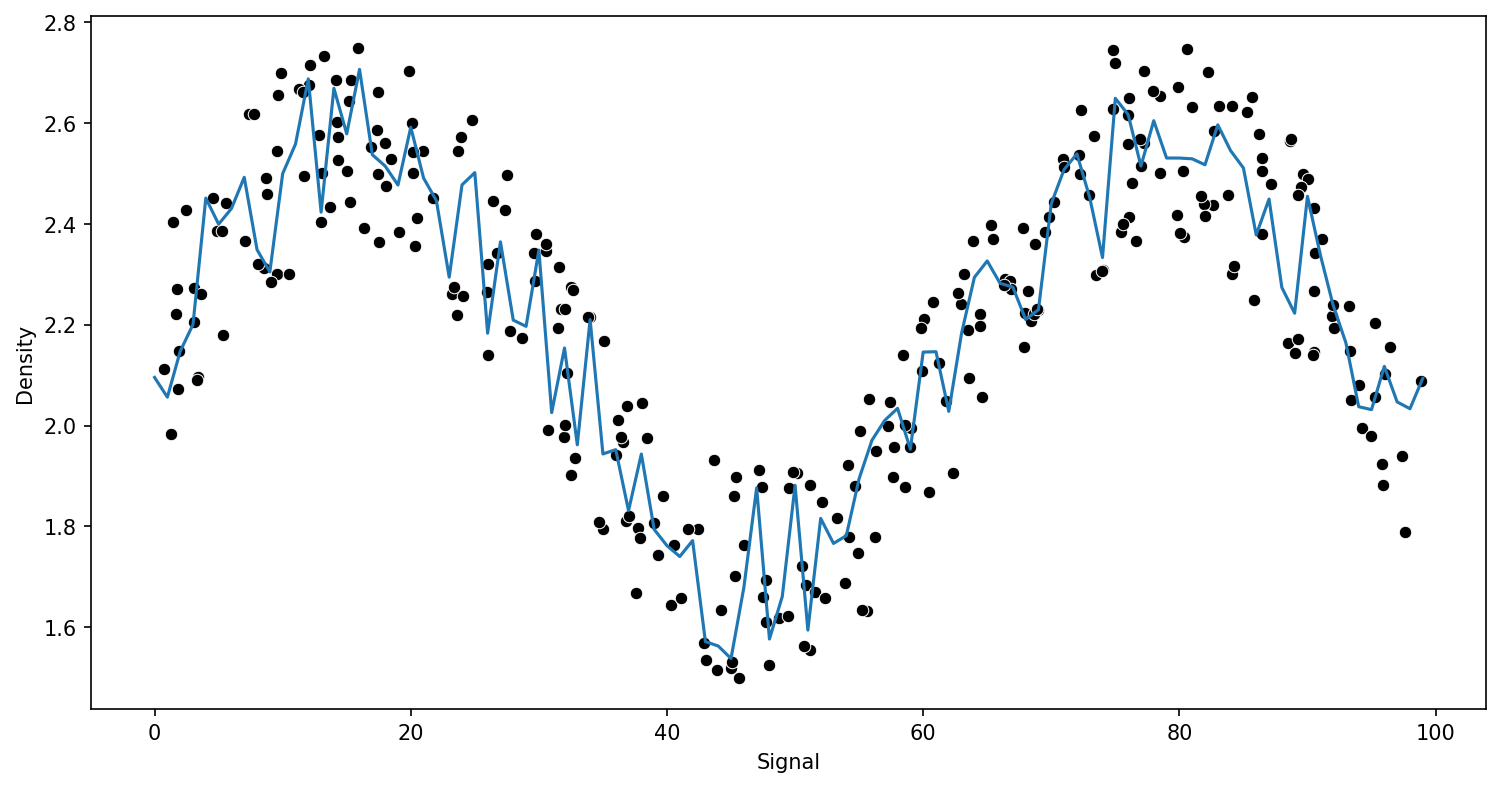

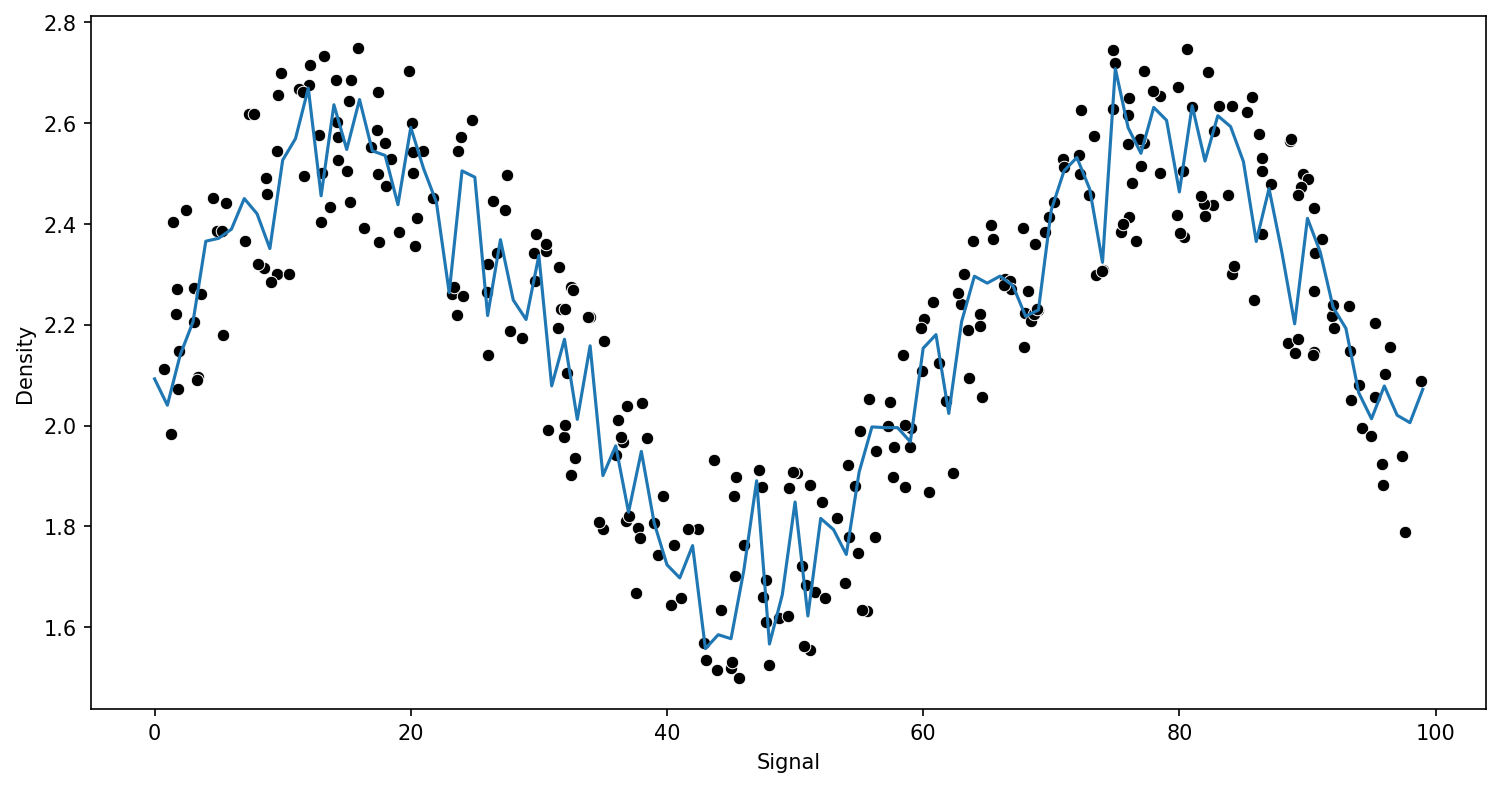

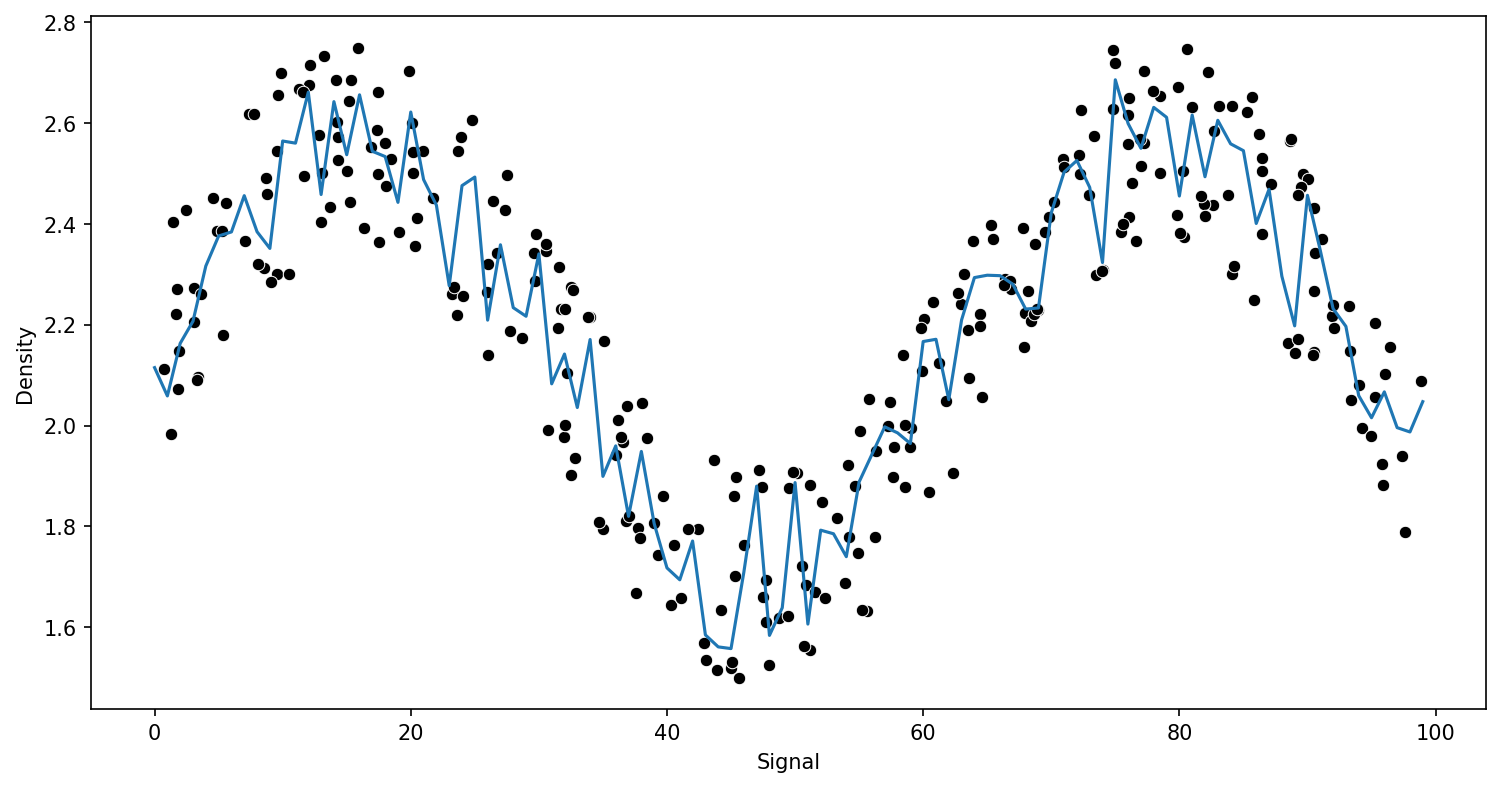

In [48]:
trees = [10,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

RMSE : 0.13294148649584667


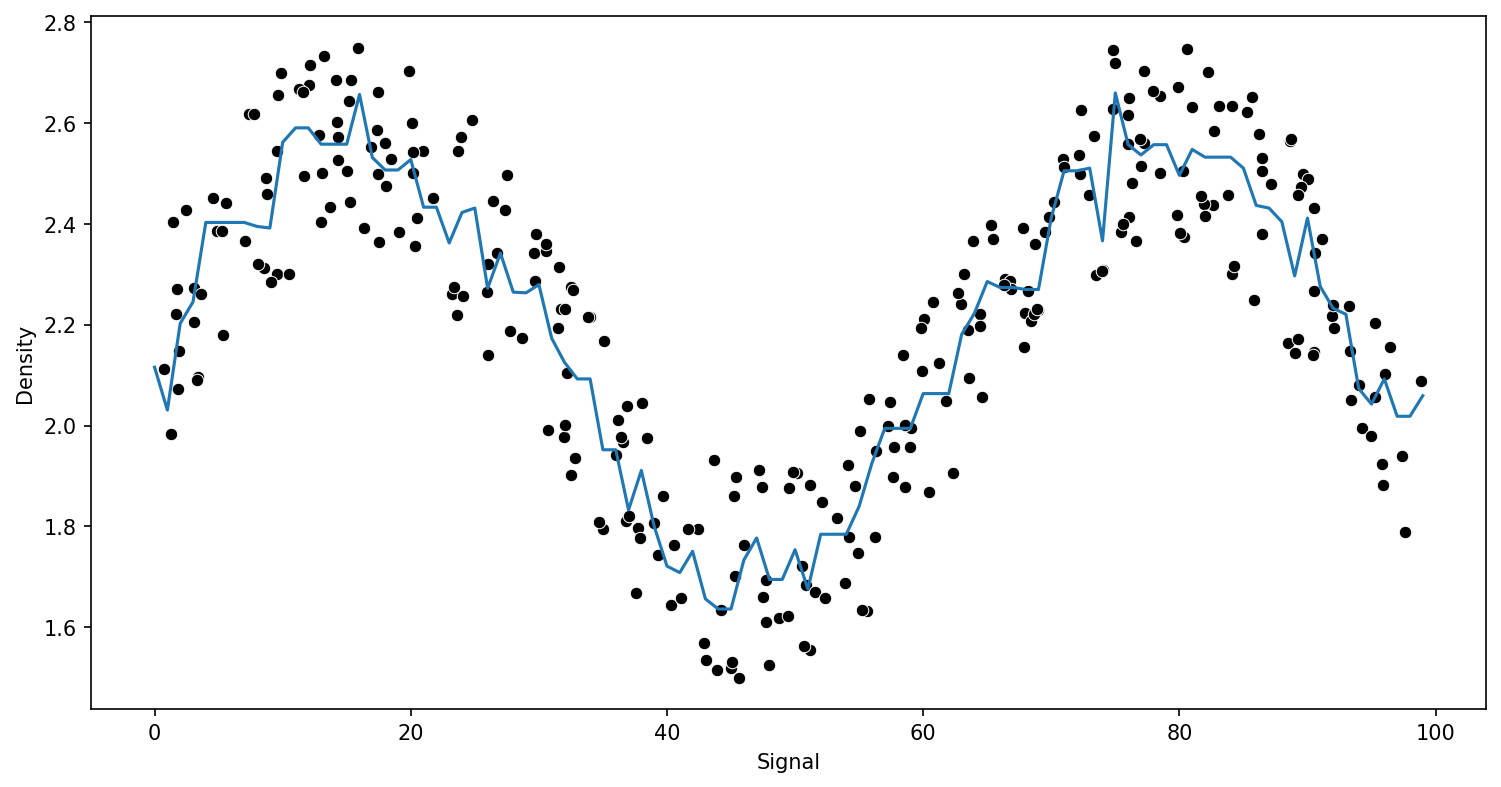

In [50]:
   
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)